In [2]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('../src'))
from Tablas_mortalidad import *
pd.set_option('display.float_format', '{:,.2f}'.format)

archivo_excel = r'TM_hombres.xlsx'

tm_hombre = pd.read_excel(archivo_excel)
tm_hombre=(TMensual(tm_hombre))
print(tm_hombre.head(5)) 

archivo_excel = r'TM_mujeres.xlsx'
tm_mujer = pd.read_excel(archivo_excel)
tm_mujer=(TMensual(tm_mujer))
print(tm_mujer.head(5)) 

archivo_excel = r'datos_longevidad.xlsx'
longevidad = pd.read_excel(archivo_excel, sheet_name='Data')
print(longevidad.head(5)) 



      x         l(x)  q(x)  p(x)
0 15.00 1,000,000.00  0.00  1.00
1 15.08   999,959.58  0.00  1.00
2 15.17   999,919.17  0.00  1.00
3 15.25   999,878.75  0.00  1.00
4 15.33   999,838.33  0.00  1.00
      x         l(x)  q(x)  p(x)
0 15.00 1,000,000.00  0.00  1.00
1 15.08   999,977.33  0.00  1.00
2 15.17   999,954.67  0.00  1.00
3 15.25   999,932.00  0.00  1.00
4 15.33   999,909.33  0.00  1.00
   Unnamed: 0  Edad  Casado Genero  Edad_pareja Sexo_pareja  Pago_mensual
0           1    68       0      M            0           0  4,196,583.06
1           2    67       1      H           67           H  1,983,941.40
2           3    80       1      H           77           H  4,014,628.81
3           4    71       1      H           85           M  5,710,179.97
4           5    66       0      M            0           0  7,882,172.76


In [3]:
v_jubilado=[]
v_pareja=[]
i=0.04/12
for index, row in longevidad.iterrows():
    genero=row['Genero']
    if genero=='H':
        tmort=tm_hombre
    else:
        tmort=tm_mujer
    if row['Casado']==0:
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad) * 12
        T['Vn'] = np.ones(len(T)) *(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect = pago * T['Vn'] * T['p(x)']
        va_jubilado = sum_vect.sum()
        va_pareja = 0

        v_jubilado.append(va_jubilado)
        v_pareja.append(va_pareja)

        

        
    elif row['Casado']==1:

        #Renta vitalicia Reversible
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad)*12
        T['Vn'] = np.ones(len(T))*(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect=pago*T['Vn']*T['p(x)']
        va_jubilado=sum_vect.sum()

        edad_pareja=row['Edad_pareja']
        genero_pareja=row['Sexo_pareja']
        if genero_pareja=='H':
            tmort_pareja=tm_hombre
        else:
            tmort_pareja=tm_mujer
            
        T_par=tmort_filtered(tmort_pareja,edad_pareja)
        T_par['n'] = T_par['x'].apply(lambda x: x - edad_pareja)*12
        T_par['Vn'] = np.ones(len(T_par))*(1/(1+i))
        T_par['Vn'] = T_par.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        if edad<=edad_pareja:
            T_par['q(x)_Jub'] = T['q(x)'][:len(T_par)]
        else:
            lista=[]
            gap=(edad-edad_pareja)*12
            lista = list(T['q(x)'])+list(np.ones(gap))
            T_par['q(x)_Jub']=lista
            
        sum_vect_pareja=pago*T_par['Vn']*T_par['p(x)']*T_par['q(x)_Jub']
        va_pareja=sum_vect_pareja.sum()
        
        v_jubilado.append(va_jubilado)
        v_pareja.append(va_pareja)

longevidad['Valoracion Jubilado']=v_jubilado
longevidad['Valoracion pareja']=v_pareja
longevidad['Pago_mensual']=longevidad['Pago_mensual'].apply(lambda x: f'{x:,.2f}')
longevidad['Valoracion']=longevidad['Valoracion Jubilado']+longevidad['Valoracion pareja']
longevidad
        


    

C:\Users\edgar.torres\AppData\Local\Temp\ipykernel_8352\157458038.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['n'] = T['x'].apply(lambda x: x - edad) * 12
C:\Users\edgar.torres\AppData\Local\Temp\ipykernel_8352\157458038.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['Vn'] = np.ones(len(T)) *(1/(1+i))
C:\Users\edgar.torres\AppData\Local\Temp\ipykernel_8352\157458038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual,Valoracion Jubilado,Valoracion pareja,Valoracion
0,1,68,0,M,0,0,"4,196,583.06","1,017,456,036.16",0.00,"1,017,456,036.16"
1,2,67,1,H,67,H,"1,983,941.40","484,784,234.22","4,985,840.73","489,770,074.95"
2,3,80,1,H,77,H,"4,014,628.81","828,188,996.93","53,608,562.26","881,797,559.19"
3,4,71,1,H,85,M,"5,710,179.97","1,339,739,654.76","6,941,368.13","1,346,681,022.89"
4,5,66,0,M,0,0,"7,882,172.76","1,946,327,113.36",0.00,"1,946,327,113.36"
...,...,...,...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,"2,994,379.20","640,482,469.74",0.00,"640,482,469.74"
1196,1197,72,1,M,69,H,"3,778,424.20","877,935,210.33","36,050,544.95","913,985,755.27"
1197,1198,76,0,M,0,0,"3,839,464.83","846,745,509.27",0.00,"846,745,509.27"
1198,1199,77,0,H,0,0,"10,827,760.94","2,348,062,669.86",0.00,"2,348,062,669.86"


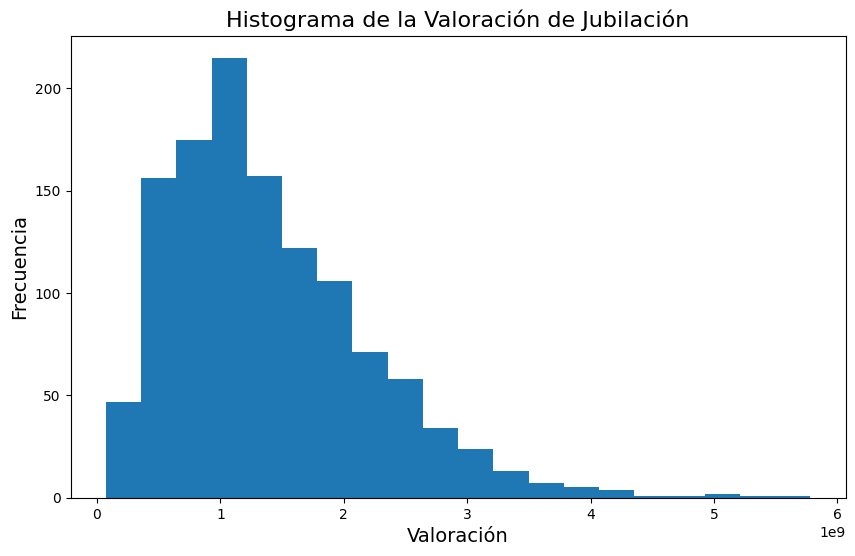

In [7]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(10, 6))
#plt.hist(longevidad['Valoracion'], bins=30, color='skyblue', edgecolor='black')
plt.hist(longevidad['Valoracion'],bins=20)

# Personalizar el gráfico
plt.title('Histograma de la Valoración de Jubilación', fontsize=16)
plt.xlabel('Valoración', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()


In [16]:
import scipy.stats as stats
shape, loc, scale = stats.gamma.fit(longevidad['Valoracion'])

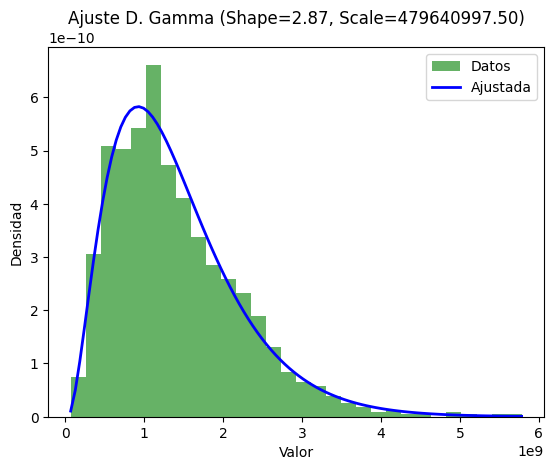

In [15]:
x = np.linspace(min(longevidad['Valoracion']), max(longevidad['Valoracion']),100)
pdf_gamma_ajustada = stats.gamma.pdf(x, shape, loc, scale)
plt.hist(longevidad['Valoracion'], bins=30, density=True, alpha=0.6, color='g', label ='Datos')
plt.plot(x, pdf_gamma_ajustada,'b-', linewidth=2, label='Ajustada')

plt.title(f"Ajuste D. Gamma (Shape={shape:.2f}, Scale={scale:.2f})")
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()